## Assignment 1A

* Filters are applied on Images using Convolution
* Following is an example: 
   * `Image (5x5) * Filter (3x3) = New_Image (5x5)`

```
Image:
    [0, 0, 1, 1, 1],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 0, 1],
    [1, 0, 0, 1, 0],
    [0, 0, 1, 0, 0]

kernel
        [0, 0, 1],
        [1, 1, 0],
        [1, 0, 0]
```

* Sample Calculation
```
    [|0,  0, 1,| 1, 1]        
    [|1, *0, 0,| 0, 0]     0, 0, 1          0*0 + 0*0 + 1*1
    [|1,  0, 0,| 0, 1]     1, 1, 0    =   + 1*1 + 0*1 + 0*0  = 3
    [ 1,  0, 0,  1, 0]     1, 0, 0        + 1*1 + 0*0 + 0*0
    [ 0,  0, 1,  0, 0]
```

* For edges, cv2.filter2d does mirroring of adjacent values. Example:
```                                                                 
[ *0, 1, 0, 1, 1]   
[  3, 2, 1, 0, 0]          
```    

 ```                                                                
          2,  3, 2
=>      1, *0, 1 
          2,  3, 2
 
 ```



In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

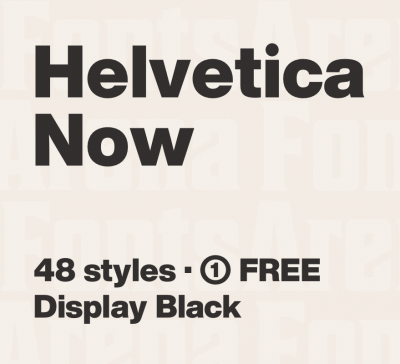

In [3]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

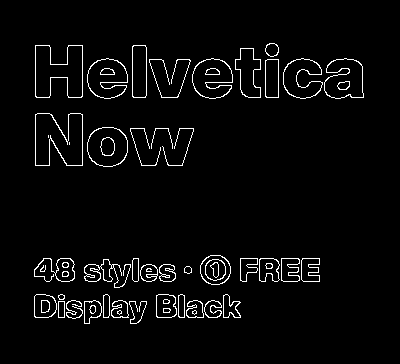

In [5]:
cv2_imshow(edges)

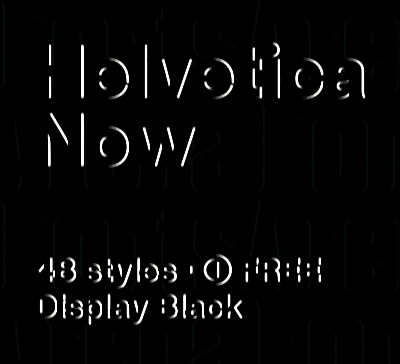

In [6]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

In [0]:
import matplotlib.pyplot as plt

def plot_results(image, conv_image, clim=None):
  fig=plt.figure(figsize=(8, 8))

  fig.add_subplot(1, 2, 1)
  plt.imshow(image, interpolation='nearest').set_cmap('hot')

  fig.add_subplot(1, 2, 2)
  plt.imshow(conv_image, interpolation='nearest').set_cmap('hot')
  if clim: plt.clim(clim[0], clim[1])
  plt.show()

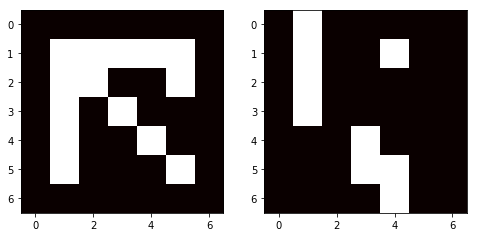

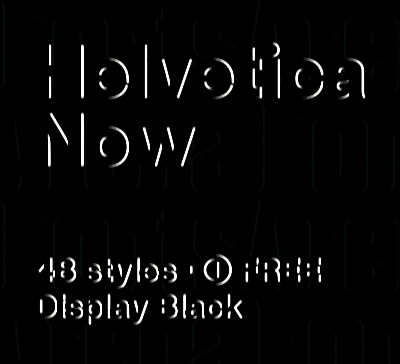

In [201]:
# Vertical Edge Filter

img = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 0, 0, 1, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0]], dtype=np.float32)

kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(img,-1,kernel)
plot_results(img, dst, [0,1])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

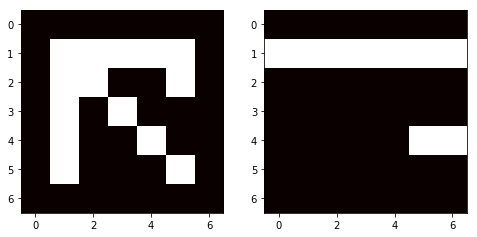

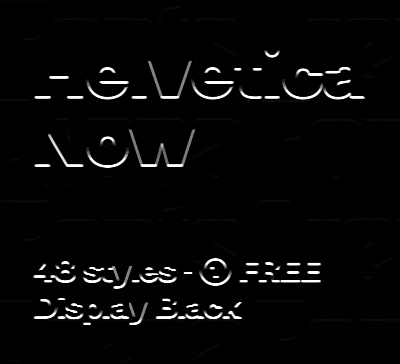

In [203]:
# Horizontal Edge Filter

img = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 0, 0, 1, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0]], dtype=np.float32)

i1mg = np.array([
    [0, 0, 1, 1, 1],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 0, 1],
    [1, 0, 0, 1, 0],
    [0, 0, 1, 0, 0]], dtype=np.float32)


kernel = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])

dst = cv2.filter2D(img,-1,kernel)
plot_results(img, dst, [0,1])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

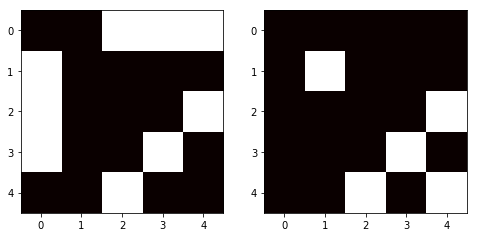

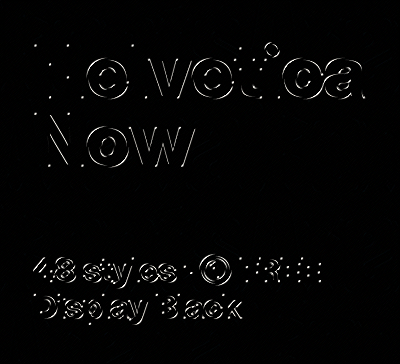

In [204]:
# 45 Degree Edge Filter

img = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 0, 0, 1, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0]], dtype=np.float32)

img = np.array([
    [0, 0, 1, 1, 1],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 0, 1],
    [1, 0, 0, 1, 0],
    [0, 0, 1, 0, 0]], dtype=np.float32)


kernel = np.float32(
    [
        [-1, -1, 2],
        [-1, 2, -1],
        [2, -1, -1]
    ])

dst = cv2.filter2D(img,-1,kernel)
plot_results(img, dst, [1,2])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

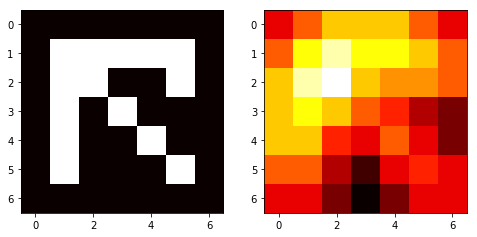

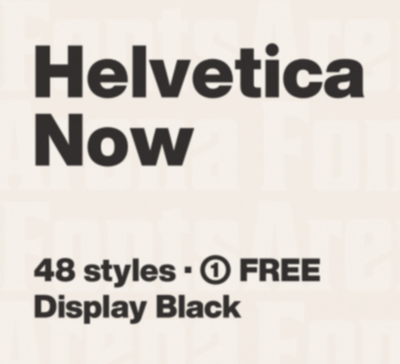

In [209]:
# Blur Filter

img = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 0, 0, 1, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0]], dtype=np.float32)


kernel = np.float32(
    [
        [0.0625, 0.125, 0.0625],
        [0.125, 0.25, 0.125],
        [0.0625, 0.125, 0.0625]
    ])

dst = cv2.filter2D(img,-1,kernel)
plot_results(img, dst)

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

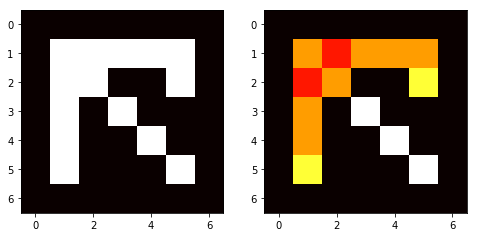

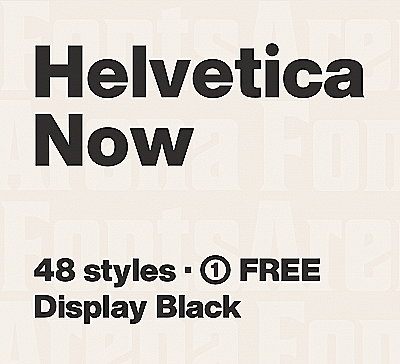

In [210]:
# Sharpen Filter

img = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 0, 0, 1, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0]], dtype=np.float32)


kernel = np.float32(
    [
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]
    ])

dst = cv2.filter2D(img,-1,kernel)
plot_results(img, dst, [0, None])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

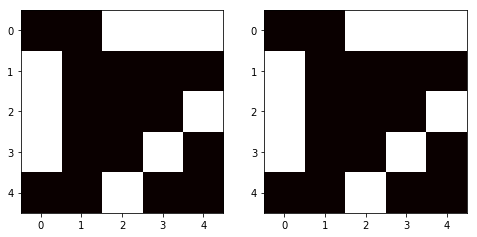

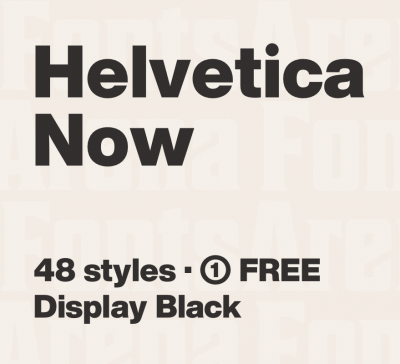

In [207]:
# Identity Filter
"""
Notes:  Since convolution does element-wise multiplication and
        then sum of all the values, we keep anchor value to be 1
        and rest to be 0 in kernel. This way we form Identity kernel
        
    [|0,  0, 0,| 1, 1]        
    [|0, *0, 1,| 0, 0]     0, 0, 0          0*0 + 0*0 + 0*0
    [|0,  1, 0,| 0, 0]     0, 1, 0    =   + 0*0 + 0*0 + 0*1  = 0
    [ 0,  1, 1,  1, 1]     0, 0, 0        + 0*0 + 0*1 + 0*0
    [ 0,  0, 1,  1, 1]

"""

img = np.array([
    [0, 0, 1, 1, 1],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 0, 1],
    [1, 0, 0, 1, 0],
    [0, 0, 1, 0, 0]], dtype=np.float32)

kernel = np.float32(
    [
        [0, 0, 0],
        [0, 1, 0],
        [0, 0, 0]
    ])

dst = cv2.filter2D(img,-1,kernel)
plot_results(img, dst)

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)